In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [11]:
df = pd.read_csv('D:/minst.csv')


In [12]:
# Normalize the pixel values (divide by 255 to scale between 0 and 1)
X = X / 255.0

# Reshape the data into 28x28 images (assuming the dataset represents images in a flattened format)
X = X.values.reshape(-1, 28, 28, 1)

# One-hot encode the labels for classification
y = to_categorical(y, num_classes=10)


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Build a simple CNN model
model = Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

In [15]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
750/750 [==============================] - 17s 22ms/step - loss: 0.5217 - accuracy: 0.8116 - val_loss: 0.3661 - val_accuracy: 0.8658
Epoch 2/10
750/750 [==============================] - 17s 23ms/step - loss: 0.3403 - accuracy: 0.8786 - val_loss: 0.3495 - val_accuracy: 0.8715
Epoch 3/10
750/750 [==============================] - 17s 23ms/step - loss: 0.2945 - accuracy: 0.8937 - val_loss: 0.2816 - val_accuracy: 0.8958
Epoch 4/10
750/750 [==============================] - 17s 22ms/step - loss: 0.2570 - accuracy: 0.9068 - val_loss: 0.2789 - val_accuracy: 0.8982
Epoch 5/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2329 - accuracy: 0.9141 - val_loss: 0.2852 - val_accuracy: 0.8970
Epoch 6/10
750/750 [==============================] - 16s 21ms/step - loss: 0.2124 - accuracy: 0.9219 - val_loss: 0.2567 - val_accuracy: 0.9075
Epoch 7/10
750/750 [==============================] - 16s 21ms/step - loss: 0.1924 - accuracy: 0.9289 - val_loss: 0.2753 - val_accuracy:

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

375/375 [==============================] - 1s 4ms/step - loss: 0.2587 - accuracy: 0.9114
Test Accuracy: 91.14%


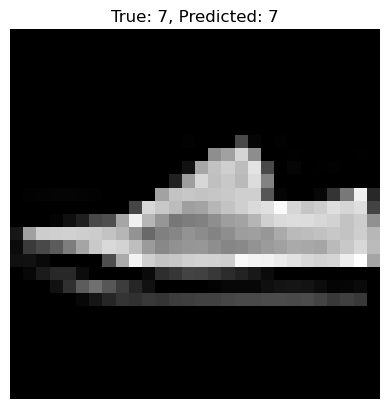

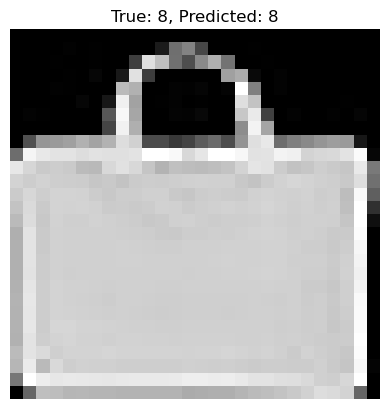

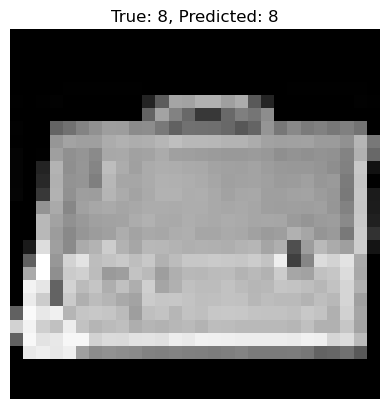

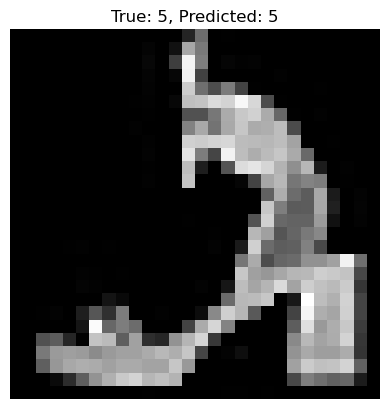

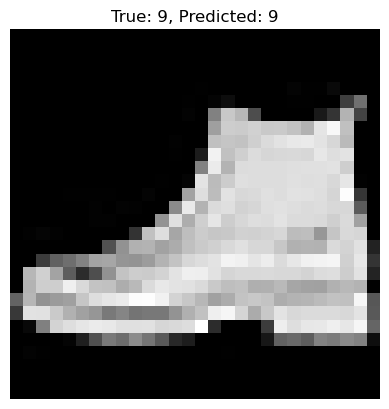

In [24]:
prediction =model.predict(X_test)
predicted_classes=np.argmax(prediction,axis=1)
true_classes=np.argmax(y_test,axis=1)
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_classes[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()